<a href="https://colab.research.google.com/github/FazleRabbbiferdaus172/table_detection_cell_value/blob/main/table_ditection_and_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2023-10-02 11:22:34--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-10-02 11:22:34 (70.3 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'dataTable.png'
img = cv2.imread(image_path)
img.shape

(217, 501, 3)

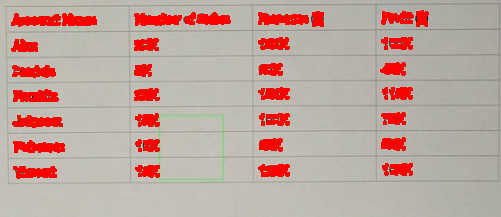

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image_path = 'dataTable.png'
img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

dst = cv2.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2_imshow(img)

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image_path = 'dataTable.png'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Create a Line Segment Detector object
lsd = cv2.createLineSegmentDetector(0)

# Detect lines
lines, _, _, _ = lsd.detect(gray)

# Iterate through the detected lines
for i, line in enumerate(lines):
    x1, y1, x2, y2 = line[0]

    # Crop the segment using slicing
    segment = img[min(y1, y2):max(y1, y2), min(x1, x2):max(x1, x2)]

    # Save or process the segment as needed
    cv2.imwrite(f'segment_{i}.jpg', segment)

# Display the original image with detected lines
drawn_lines = lsd.drawSegments(img, lines)
print(len(lines), lines[0])
cv2_imshow(img)

TypeError: ignored

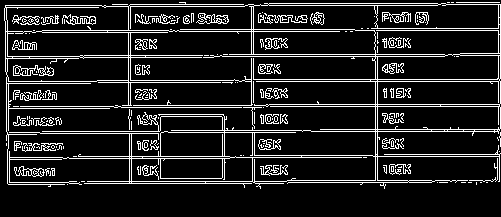

139


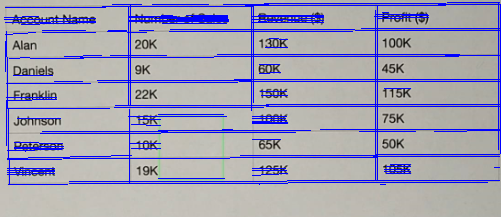

In [ ]:
image_path = 'dataTable.png'
img = cv2.imread(image_path)
img.shape

# # Step 2: Apply Hough Line Transform
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1)
edges = cv2.Canny(gray, 10, 50)
cv2_imshow(edges)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=0, maxLineGap=10
                        )
print(len(lines))
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)
    # cv2_imshow(img)
    # cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the result
cv2_imshow(img)

In [ ]:
intersections = []

for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
        x1, y1, x2, y2 = lines[i][0]
        x3, y3, x4, y4 = lines[j][0]

        # Calculate the intersection point
        denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

        if denominator != 0:
            px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denominator
            py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denominator

            # Ensure the intersection point is within the image bounds
            if 0 <= int(px) < img.shape[1] and 0 <= int(py) < img.shape[0]:
                intersections.append((int(px), int(py)))

# Draw circles at intersection points for visualization
for point in intersections:
    cv2.circle(img, point, 5, (0, 0, 255), -1)

KeyboardInterrupt: ignored

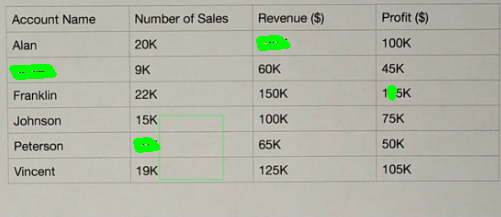

In [ ]:
# Load the image
# image_path = 'dataTable.png'
# img = cv2.imread(image_path)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur and Canny edge detection
# blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours
for contour in contours:
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) == 4 and cv2.isContourConvex(approx):
        cv2.drawContours(img, [approx], 0, (0, 255, 0), 5)

# Display the result
cv2_imshow(img)

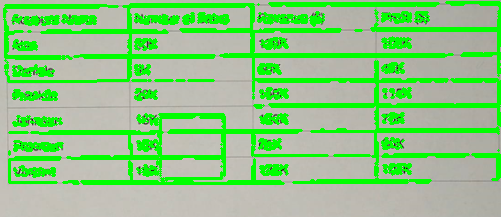

In [ ]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur and Canny edge detection
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(gray, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours
for contour in contours:
    epsilon = 0.000004 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if cv2.isContourConvex(approx):
        cv2.drawContours(img, [approx], 0, (0, 0, 255), 2)
# Display the result
cv2_imshow(img)

In [ ]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Information to draw bounding box
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


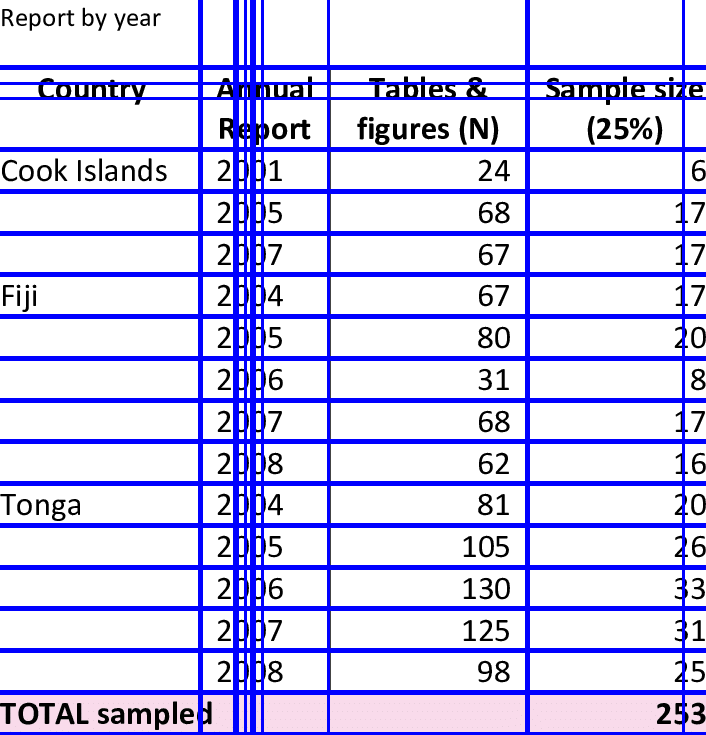

In [ ]:
# Load the image
image_path = 'dataTable3.png'
img = cv2.imread(image_path)  # Load as grayscale

edges = cv2.Canny(img, 50, 150)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Iterate through the lines
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Find intersections of lines
# intersections = cv2.bitwise_and(cv2.bitwise_not(edges), img)
cv2_imshow(img)

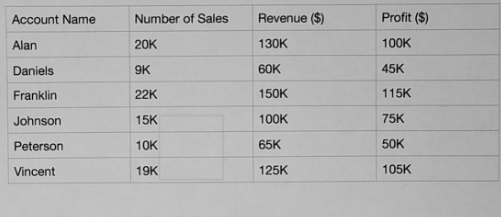

In [ ]:
cv2_imshow(img)

In [ ]:
!pip install img2table

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.3/154.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.17.3
    Uninstalling polars-0.17.3:
      Successfully uninstalled polars-0.17.3


In [ ]:
!pip install pytesseract
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,748 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!apt install tesseract-ocr-ben

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ben
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 516 kB of archives.
After this operation, 870 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ben all 1:4.00~git30-7274cfa-1.1 [516 kB]
Fetched 516 kB in 1s (916 kB/s)
Selecting previously unselected package tesseract-ocr-ben.
(Reading database ... 120942 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-ben_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-ben (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-ben (1:4.00~git30-7274cfa-1.1) ...


In [ ]:
!apt search tesseract

Sorting... Done
Full Text Search... Done
gimagereader/jammy 3.4.0-2 amd64
  Graphical GTK+ front-end to tesseract-ocr

gimagereader-qt5/jammy 3.4.0-2 amd64
  Graphical Qt 5 front-end to tesseract-ocr

libtesseract-dev/jammy 4.1.1-2.1build1 amd64
  Development files for the tesseract command line OCR tool

libtesseract4/jammy,now 4.1.1-2.1build1 amd64 [installed,automatic]
  Tesseract OCR library

python3-tesserocr/jammy 2.5.2-1build1 amd64
  Python wrapper for the tesseract-ocr API (Python3 version)

r-cran-tesseract/jammy 5.1.0-1cran1.2204.0 amd64
  GNU R package "Open Source OCR Engine"

tesseract-ocr/jammy,now 4.1.1-2.1build1 amd64 [installed]
  Tesseract command line OCR tool

tesseract-ocr-afr/jammy 1:4.00~git30-7274cfa-1.1 all
  tesseract-ocr language files for Afrikaans

tesseract-ocr-all/jammy 4.1.1-2.1build1 all
  Tesseract OCR with all language and script packages

tesseract-ocr-amh/jammy 1:4.00~git30-7274cfa-1.1 all
  tesseract-ocr language files for Amharic

tesseract-ocr-a

In [ ]:
    def _to_worksheet(self, sheet: Worksheet, cell_fmt: Optional[Format] = None):
        """
        Populate xlsx worksheet with table data
        :param sheet: xlsxwriter Worksheet
        :param cell_fmt: xlsxwriter cell format
        """
        # Group cells based on hash (merged cells are duplicated over multiple rows/columns in content)
        dict_cells = dict()
        for id_row, row in self.content.items():
            for id_col, cell in enumerate(row):
                cell_pos = CellPosition(cell=cell, row=id_row, col=id_col)
                dict_cells[hash(cell)] = dict_cells.get(hash(cell), []) + [cell_pos]

        # Write all cells to sheet
        for c in dict_cells.values():
            if len(c) == 1:
                cell_pos = c.pop()
                sheet.write(cell_pos.row, cell_pos.col, cell_pos.cell.value, cell_fmt)
            else:
                # Get all rectangles
                for rect in create_all_rectangles(cell_positions=c):
                    col_left, top_row, col_right, bottom_row = rect
                    # Case of merged cells
                    sheet.merge_range(first_row=top_row,
                                      first_col=col_left,
                                      last_row=bottom_row,
                                      last_col=col_right,
                                      data=c[0].cell.value,
                                      cell_format=cell_fmt)

NameError: ignored

In [ ]:
from img2table.document import Image
from img2table.ocr import TesseractOCR

# Instantiation of the image
img = Image(src="dataTable6.jpg")

ocr = TesseractOCR(lang="eng")

# Table identification
# extracted_tables = img.extract_tables(ocr=ocr)
# extracted_tables = {0: extracted_tables} if isinstance(extracted_tables, list) else extracted_tables

# Result of table identification
# for page, tables in extracted_tables.items():
#     for idx, table in enumerate(tables):
#         dict_row = dict()
#         for id_row, row in table.content.items():
#             dict_cells = dict()
#             for id_col, cell in enumerate(row):
#                 # print(id_col, cell)
#                 # cell_pos = CellPosition(cell=cell, row=id_row, col=id_col)
#                 # dict_cells[hash(cell)] = dict_cells.get(hash(cell), []) + [cell_pos]
#                 dict_cells[id_col] = cell.value
#             dict_row[id_row] = dict_cells
# for key, value in dict_row.items():
#     print(list(value.values()))

img.to_xlsx('tables.xlsx',
            ocr=ocr)